In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from inference import start_inference
# from v107 import extract
import os
import detectron2
import torch
import torchvision
import pandas as pd
from inference import *
import numpy as np
np.random.seed(seed=67)

In [3]:
# ! python3 inference.py paths.txt ./datasets/main/JPEGImages/00001.jpg \
# /home/kim/juche/projects/ISC21-Descriptor-Track-1st/exp/v107/train/checkpoint_0009.pth.tar \
# --config-file configs/voc/defrcn_main_1shot_seed0.yaml

In [4]:
# rand_indices = list(np.random.randint(low=0, high=6777, size=1000))

In [5]:
paths = np.array([os.path.join("logo_new/", _)+"\n" \
                  for _ in os.listdir("./logo_new/") \
                  if os.path.splitext(_)[-1] in [".jpg", ".jpeg", ".png", ".bmp"]])

In [6]:
os.path.splitext("_.png")

('_', '.png')

In [7]:
with open("paths_logos.txt", encoding="utf-8", mode="w") as f:
    f.writelines(list(paths))

In [8]:
ddesc = DetDescriptor("configs/voc/defrcn_main_1shot_seed0.yaml", 
              "/home/kim/juche/projects/ISC21-Descriptor-Track-1st/exp/v107/train/checkpoint_0009.pth.tar", 
              0.2, 0.7)

In [9]:
ddesc.describe_image_list("./paths_logos.txt")

  5%|▌         | 186/3601 [00:25<07:56,  7.17it/s]


KeyboardInterrupt: 

In [10]:
image_fn = "old/old_logo_air_force_flag__75465.1471447860.380.380.jpg"

--------------------------

В compare_embeddings нужно убрать вычисление эмбеддингов для списка изображений (пока, для сервиса в стримлит). Для полного цикла сделать отдельную функцию, или в зависимости от содержимого JSON файла, подаваемого на вход compare_embeddings, запускать или не запускать индексацию списка изображений.

In [11]:
sim_file = ddesc.compare_embeddings(json_path="./results/detection_20220516-1532/result.embeddings.json", image_fn=image_fn, bbox=None)

(256,)
Saved cosine similarities to ./results/detection_20220516-1532/result.embeddings.cosine.json


In [68]:
# concat 2 json files
df1 = pd.read_json("/home/kim/juche/projects/DeFRCN/results/detection_20220517-0020/result.embeddings.json")
df2 = pd.read_json('./results/detection_20220518-1537/result.embeddings.json')
df_new = pd.concat([df1,  df2])
df_new.reset_index(drop=True, inplace=True)
df_new.to_json("./results/detection_20220517-0020/result.embeddings.logos.json", force_ascii=False)

In [70]:
pd.read_json('./results/detection_20220518-1537/result.embeddings.json')

,id,im_fn,box,label,score,embedding
0,188300,logo_new/1883.jpg,"[4.483271598815918, 0.0, 201.10044860839844, 2...",0,0.997748,"[-0.027142155915498, 0.066124685108661, -0.109..."
1,89800,logo_new/0898.png,"[1.7486751079559322, 12.36239242553711, 125.74...",0,0.974562,"[0.064549915492534, 0.049515049904584, -0.0549..."
2,89801,logo_new/0898.png,"[5.207756042480469, 11.326020240783691, 128.87...",0,0.764085,"[-0.001336127985268, 0.09271080791950201, 0.02..."
3,337500,logo_new/3375.jpg,"[97.46027374267578, 6.681570529937744, 287.245...",0,0.997797,"[-0.015523274429142002, 0.028925048187375003, ..."
4,131400,logo_new/1314.jpg,"[4.042033672332764, 0.0, 229.18736267089844, 2...",0,0.960886,"[-0.020401990041136003, -0.0014929294120520002..."
...,...,...,...,...,...,...
4906,123801,logo_new/1238.jpg,"[0.0, 22.183996200561523, 146.46185302734375, ...",0,0.339932,"[-0.002465304918587, 0.062320094555616004, -0...."
4907,100600,logo_new/1006.jpg,"[13.077507972717285, 9.106795310974121, 266.25...",2,0.938955,"[-0.07548981904983501, -0.035645380616188, -0...."
4908,100601,logo_new/1006.jpg,"[145.15296936035156, 16.241947174072266, 288.1...",2,0.915177,"[-0.10093344748020101, -0.065158687531948, -0...."
4909,100602,logo_new/1006.jpg,"[3.785365581512451, 11.950271606445312, 107.80...",2,0.570735,"[-0.048528086394071, -0.031883317977190004, -0..."


In [26]:
df_new = pd.concat([df1,  df2])

In [27]:
df_new

In [31]:
df_new.to_json("./results/detection_20220517-0020/result.embeddings.logos.json", force_ascii=False)

In [37]:
pd.read_json("./results/detection_20220517-0020/result.embeddings.logos.cosine.json")

,id,im_fn,box,label,score,embedding
0,88900,datasets/main/JPEGImages/00889.jpg,"[28.9042491913, 2.9329102039, 266.0728149414, ...",0,0.868015,"[-0.0292539764, 0.11848796900000001, 0.0294562..."
1,436600,datasets/main/JPEGImages/04366.jpg,"[37.9705467224, 22.2553062439, 97.3394241333, ...",0,0.622292,"[0.0676688477, 0.0385974124, 0.0105206994, 0.0..."
2,138600,datasets/main/JPEGImages/01386.jpg,"[2.9893379211, 23.7371921539, 217.8111114502, ...",0,0.987109,"[-0.0795284361, -0.0632141382, 0.0111836186, -..."
3,138601,datasets/main/JPEGImages/01386.jpg,"[150.4172668457, 17.6890392303, 219.9999847412...",0,0.834946,"[-0.0428383052, -0.0068098442, -0.033668611200..."
4,488300,datasets/main/JPEGImages/04883.jpg,"[458.7797546387, 0.0, 893.2997436523, 564.4433...",1,0.954990,"[0.0422954261, 0.0366908982, -0.0904471651, 0...."
...,...,...,...,...,...,...
8573,191700,logo_new/1917.jpg,"[1.5441861153, 0.0, 225.6563568115, 207.655059...",0,0.999086,"[0.033722356, -0.0106750373, -0.0501995198, 0...."
8574,123800,logo_new/1238.jpg,"[0.0, 9.2468223572, 279.0, 179.9259490967]",0,0.974701,"[0.030605193200000002, 0.0528632328, -0.023114..."
8575,100600,logo_new/1006.jpg,"[13.0775079727, 9.106795311, 266.2541503906, 1...",2,0.938955,"[-0.075489819, -0.0356453806, -0.0774013773, -..."
8576,100601,logo_new/1006.jpg,"[145.1529693604, 16.2419471741, 288.1080932617...",2,0.915177,"[-0.10093344750000001, -0.0651586875, -0.01274..."


In [34]:
with open("./results/detection_20220517-0020/result.embeddings.logos.json", mode="r", encoding="utf-8") as f:
    data = json.load(f)

In [36]:
for d in data:
    print(d)

id
im_fn
box
label
score
embedding


In [11]:
df = pd.read_json(sim_file)
df["abssim"] = df["sim"].apply(abs)
top = df.sort_values(by="abssim", ascending=False)[:10].copy(deep=True)
top

,id,im_fn,box,label,score,embedding,sim,abssim
700,245200,datasets/main/JPEGImages/02452.jpg,"[3.107270002365112, 0.0, 216.98924255371094, 2...",0,0.999311,"[0.071582719683647, -0.022659292444586, -0.046...",0.757314,0.757314
907,260100,datasets/main/JPEGImages/02601.jpg,"[1.5108788013458252, 0.0, 197.89541625976562, ...",0,0.947964,"[0.042623937129974004, -0.0011484802234910001,...",0.414422,0.414422
889,324701,datasets/main/JPEGImages/03247.jpg,"[3.331386566162109, 11.477665901184082, 148.07...",0,0.873572,"[0.018998106941580002, 0.048813369125127, -0.0...",0.393916,0.393916
487,280900,datasets/main/JPEGImages/02809.jpg,"[5.175478935241699, 15.722138404846191, 160.30...",0,0.818431,"[0.029176622629165, 0.031153144314885, -0.0403...",0.389953,0.389953
936,281700,datasets/main/JPEGImages/02817.jpg,"[3.135644912719726, 1.660465836524963, 148.929...",0,0.999472,"[0.070460587739944, 0.06500121206045101, 0.005...",0.386097,0.386097
937,281701,datasets/main/JPEGImages/02817.jpg,"[5.561604976654053, 9.502562522888184, 147.475...",0,0.716605,"[0.052475895732641005, 0.07927016913890801, 0....",0.383316,0.383316
541,329600,datasets/main/JPEGImages/03296.jpg,"[17.331525802612305, 10.562799453735352, 192.6...",0,0.799749,"[0.07844549417495701, -0.031474221497774, -0.0...",0.368680,0.368680
66,249900,datasets/main/JPEGImages/02499.jpg,"[23.42738914489746, 6.137779712677002, 149.012...",0,0.625023,"[0.042324338108301, 0.076403863728046, 0.01364...",0.367752,0.367752
757,329300,datasets/main/JPEGImages/03293.jpg,"[0.879502296447753, 0.325274109840393, 125.0, ...",0,0.998545,"[-0.013486634008586, -0.011633506976068, -0.17...",0.367590,0.367590
468,244300,datasets/main/JPEGImages/02443.jpg,"[2.073904037475586, 0.0, 150.0, 150.0]",0,0.999936,"[0.07009311020374201, -0.011921958997845001, -...",0.357233,0.357233


In [16]:
for i, _ in top.iterrows():
    print(_.im_fn)

datasets/main/JPEGImages/02452.jpg
datasets/main/JPEGImages/02601.jpg
datasets/main/JPEGImages/03247.jpg
datasets/main/JPEGImages/02809.jpg
datasets/main/JPEGImages/02817.jpg
datasets/main/JPEGImages/02817.jpg
datasets/main/JPEGImages/03296.jpg
datasets/main/JPEGImages/02499.jpg
datasets/main/JPEGImages/03293.jpg
datasets/main/JPEGImages/02443.jpg


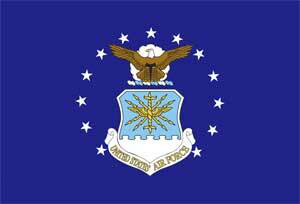

In [12]:
Image.open(image_fn).convert("RGB")

In [14]:
im = Image.open(top["im_fn"].iloc[0])

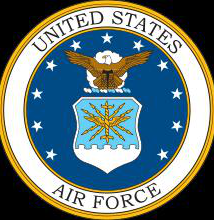

In [15]:
im.crop(box=top.iloc[0].box)

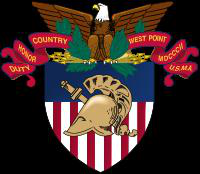

In [13]:
Image.open(top["im_fn"].iloc[1])

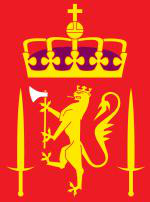

In [245]:
Image.open(top["im_fn"].iloc[2])

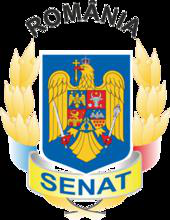

In [246]:
Image.open(top["im_fn"].iloc[3])

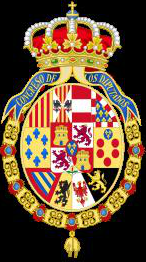

In [16]:
Image.open(top["im_fn"].iloc[4]).crop(box=top.iloc[4].box)

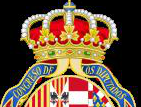

In [17]:
Image.open(top["im_fn"].iloc[5]).crop(box=top.iloc[5].box)

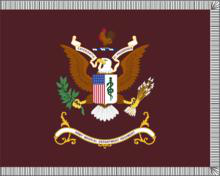

In [249]:
Image.open(top["im_fn"].iloc[6])

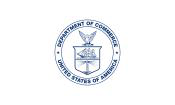

In [250]:
Image.open(top["im_fn"].iloc[7])

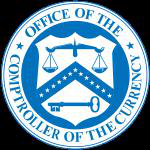

In [251]:
Image.open(top["im_fn"].iloc[9])